In [115]:
import numpy as np
import cmsisdsp as dsp
from matplotlib import pyplot as plt

In [116]:
#np.dot implementation
#algorithms for adapative filtering lms
def lms(x, y, K, mu = 0.01):
    N = len(x)
    w = np.zeros(K) # Adaptive filter:initialize
    xn = np.zeros(K) # Vector to store [x[n],x[n-1],...,x[n-K+1]]
    y_err = np.zeros(N) # Vector to track filtering error
    y_predict_result = []
    
    #convert to library data type
    #xn = dsp.arm_float_to_q15(xn)
    #w = dsp.arm_float_to_q15(w)
    
    #dot product
    for n in range(N):
        xn[0] = x[n] # Update most recent (current) value
        y_predict = np.dot(xn, w)
        y_predict_result.append(y_predict)
        e = y_predict - y[n]
        w = w - mu * e * xn
        xn = np.roll(xn, 1)
        y_err[n] = e
    return w, y_err, y_predict_result

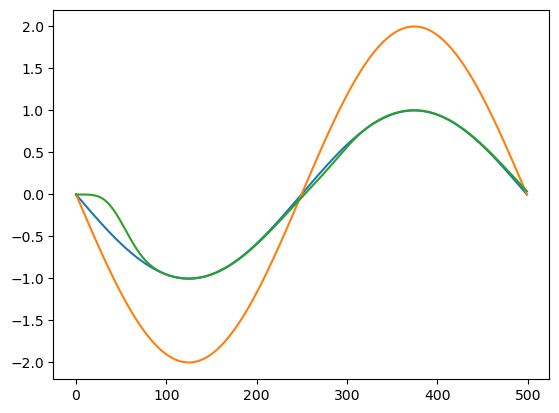

In [117]:
h = np.sin(np.linspace(-np.pi, np.pi, 500))
# y = generate_xy(h, N)
y = h + np.sin(np.linspace(-np.pi, np.pi, 500))
plt.plot(h)
plt.plot(y)

mu = 0.005
K = 8
w, y_err, y_predict_result = lms(y, h, K, mu)
plt.plot(y_predict_result)

In [118]:
print(w)

[0.06529795 0.06304112 0.06077589 0.05850419 0.05622797 0.05394917
 0.05166974 0.04939162]


In [119]:
#DSP library implementation
def lms(x, y, K, mu = 0.01):
    N = len(x)
    w = np.zeros(K) # Adaptive filter:initialize
    xn = np.zeros(K) # Vector to store [x[n],x[n-1],...,x[n-K+1]]
    y_err = np.zeros(N) # Vector to track filtering error
    y_predict_result = []
    
    #dot product
    for n in range(N):
        xn[0] = x[n] # Update most recent (current) value
        y_predict = dsp.arm_dot_prod_f32(xn, w)
        y_predict_result.append(y_predict)
        e = y_predict - y[n]
        w = w - mu * e * xn
        xn = np.roll(xn, 1)
        y_err[n] = e
    return w, y_err, y_predict_result

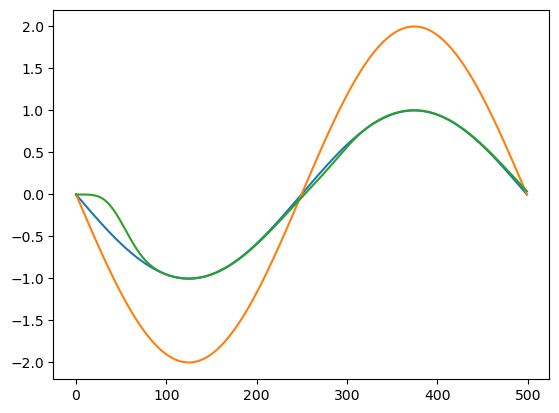

In [120]:
h = np.sin(np.linspace(-np.pi, np.pi, 500))
# y = generate_xy(h, N)
y = h + np.sin(np.linspace(-np.pi, np.pi, 500))
plt.plot(h)
plt.plot(y)

mu = 0.005
K = 8
w, y_err, y_predict_result = lms(y, h, K, mu)
plt.plot(y_predict_result)